# XCM- An Explainable Convolutional Neural Network

In [1]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, Flatten, concatenate

     


# Load the dataset
df = pd.read_csv('C:/Users/dugga/OneDrive/Desktop/ML1/ML/data/AAPL.csv')  # Assuming this is the correct path to your data file

# Let's assume 'Close' is the target variable for prediction
df = df[['Close']]
     


# Load and preprocess data (assuming the data is already loaded in variable `df`)
# Normalization of data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

     


# Preparing the dataset
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps - 1):
        X.append(data[i:(i + time_steps), :])
        y.append(data[i + time_steps, 0])  # Assuming the first column is the target
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_dataset(scaled_data, time_steps)

     


# Splitting data into training and testing sets
split_ratio = 0.8
split = int(len(X) * split_ratio)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define the XCM model
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

In [3]:
# Define the XCM model
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

# 1D Convolutional Layer for capturing local patterns
conv1 = Conv1D(filters=64, kernel_size=2, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Flatten the layer
flat = Flatten()(pool1)

# Fully connected layer
fc = Dense(64, activation='relu')(flat)

# Output layer
output_layer = Dense(1)(fc)

# Compile the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)


Epoch 1/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.0915e-05 - val_loss: 1.4108e-05
Epoch 2/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.1648e-07 - val_loss: 1.2168e-05
Epoch 3/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.4239e-07 - val_loss: 1.6992e-05
Epoch 4/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.9979e-07 - val_loss: 2.9549e-05
Epoch 5/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.8732e-07 - val_loss: 1.6742e-05
Epoch 6/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.7076e-07 - val_loss: 1.7837e-05
Epoch 7/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.0693e-07 - val_loss: 1.1832e-05
Epoch 8/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.7604e-07 - val_loss: 1.3692e-05
Epoch 9/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.5812e-07 - val_loss: 2.6229e-05
Epoch 10/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.7561e-07 - val_loss: 1.6654e-05
Epoch 11/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss

Test Loss: 0.0015907555352896452
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RMSE: 7.257378057008269
MAE: 4.825211171739027
MAPE: 6.474122334589833


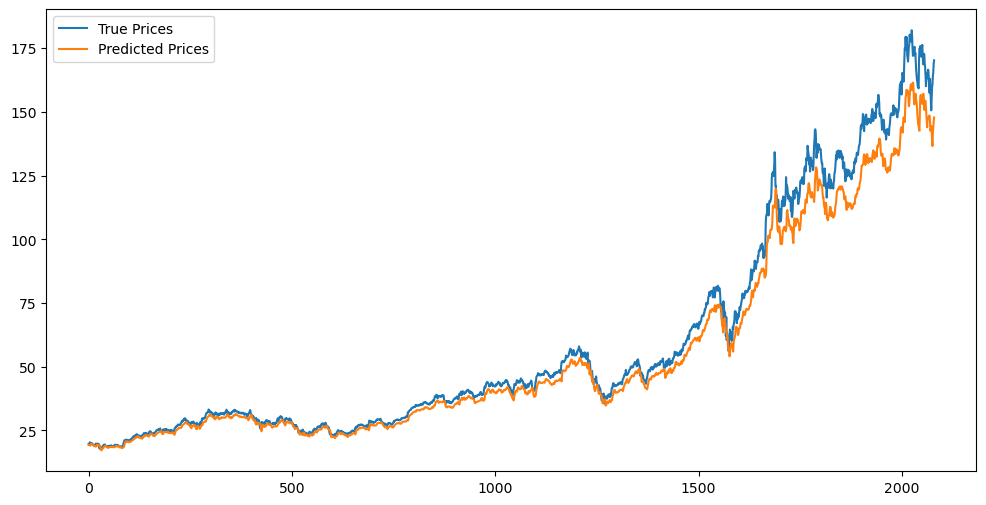

In [9]:
# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss}')

# Predict
predictions = model.predict(X_test)

# Inverse scaling
predictions_inverse = scaler.inverse_transform(np.concatenate([predictions, np.zeros((predictions.shape[0], df.shape[1] - 1))], axis=1))[:, 0]
y_test_inverse = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], df.shape[1] - 1))], axis=1))[:, 0]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inverse, predictions_inverse))
print(f'RMSE: {rmse}')

# Calculate MAE
mae = mean_absolute_error(y_test_inverse, predictions_inverse)
print(f'MAE: {mae}')

# Calculate MAPE
mape = np.mean(np.abs((y_test_inverse - predictions_inverse) / y_test_inverse)) * 100
print(f'MAPE: {mape}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='True Prices')
plt.plot(predictions_inverse, label='Predicted Prices')
plt.legend()
plt.show()